# <u>Heat Conduction</u>
## Heat Diffusion Equation
## <center>$\frac{1}{\alpha}u_{t} = u_{xx}$</center>
### <center>$u(0,t) = u(l,t)=0,  t>0$</center>
### <center>$u(x,0 = f(x))$</center>
#### <b>Separation of variables:</b>
### $u_{k}(x,t)=X_{k}(x)T_{k}(t)$
#### <b>Sub back into PDE:</b>
### $\frac{1}{\alpha}XT^{'} = X^{''}T$
### $\frac{1}{\alpha}\frac{T^{'}}{T}= \frac{X^{''}}{X}= -\lambda^{2}$
#### <b>Form two ODEs:</b>
### $X{''} + \lambda^{2}X=0$
### $T^{'}+\alpha\lambda^{2}T = 0$

In [8]:
# Use Python sympy (computer algebra) library to show the "orthogonality" of sine functions
# Try on your own - orthogonality of sine with cosine functions and orthogonality of cosine functions
import sympy as sym
sym.init_printing()
sskm, x, l = sym.symbols('sskm x l', real=True)
k, m = sym.symbols('k m', integer=True, positive=True)
sskm = sym.simplify(sym.integrate(sym.sin(m*sym.pi*x/l)*sym.sin(k*sym.pi*x/l), (x, 0, l)))
sskm


⎧0  for k ≠ m
⎪            
⎨l           
⎪─  otherwise
⎩2           

### Known temperature distribution along conductor
## <center>$\frac{1}{\alpha}u_{t} = u_{xx}$</center>
### <center>$u(0,t) = -1,  u(2,t)=-10$</center>
### <center>$u(x,0) = -10$</center>
#### <b>l = 2</b>
#### <b>To fit non Zero boundary conditions, add in term $\lambda^{2}=0$</b>
### $u_{k}(x,t)=X_{k}(x)T_{k}(t)$
### $\frac{1}{\alpha}XT^{'} = X^{''}T$
### $\frac{1}{\alpha}\frac{T^{'}}{T}= \frac{X^{''}}{X}= -\lambda^{2}$
#### <b>Form two ODEs:</b>
### $X{''} + \lambda^{2}X=0$
### $T^{'}+\alpha\lambda^{2}T = 0$

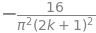

In [2]:
# Use Python sympy (computer algebra) library to perform integration
import sympy as sym
sym.init_printing()
Ak, x, t, u, α = sym.symbols('Ak x t u α', real=True)
k = sym.symbols('k', integer=True, positive=True)
Ak = sym.simplify(sym.integrate((x-2)*sym.cos((2*k+1)/4*sym.pi*x), (x,
0, 2)))
Ak

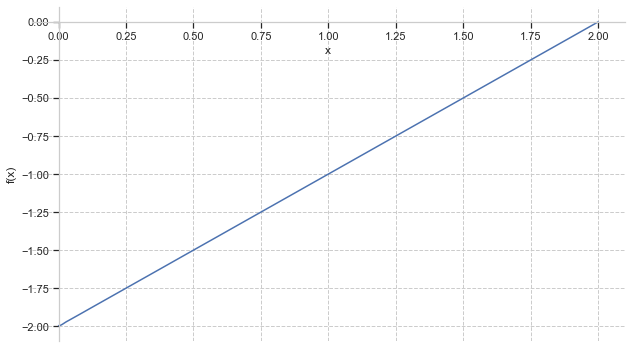

In [4]:
#Check Fourier series to see if it converges as expected to f(x) = x-2
#matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 5)
import mpmath
import sympy.plotting as symplt
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
N=100
vx0 = mpmath.nsum(lambda k: -(4/((2*k+1)*sym.pi))**2*
sym.cos((2*k+1)/4*sym.pi*x), [
0, N])
symplt.plot(vx0, (x, 0., 2.));


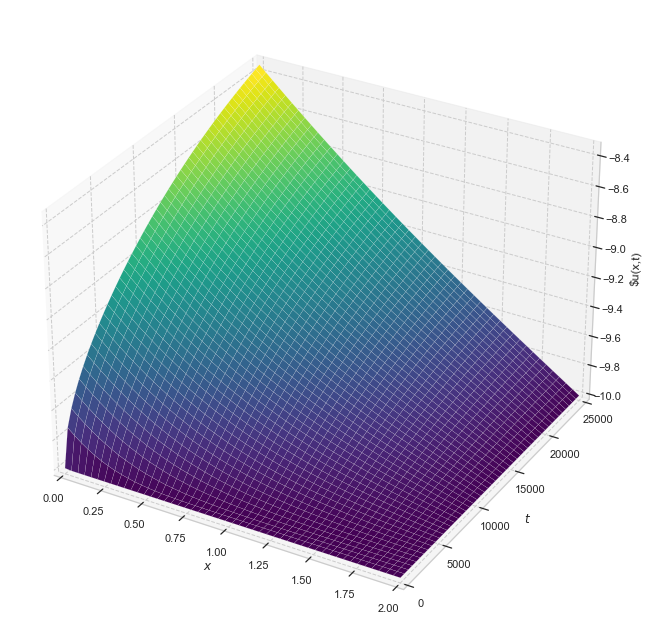

In [5]:
N = 100
α = 1.e-4
vN = mpmath.nsum(lambda k: -(4/((2*k+1)*sym.pi))**2*
sym.cos((2*k+1)/4*sym.pi*x)*sym.exp(-α*((2*k+1)/4*sym.pi)**2*t), [0, N])
uN = vN -(x+8)
#uN
import sympy.plotting as symplt
plt.rcParams["figure.figsize"] = (9, 9)
symplt.plot3d(uN, (x, 0., 2.), (t, 0., 2.5e4), xlabel='$x$', ylabel='$t$', zlabel='$u(x,t)');

# Explicit & Implicit Finite Difference Modelling

## Explicit Examples

### 1. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=-1$

$u(2,t)=-10$

Initial Conditions

$u(x,0)=-10$

In [1]:
def explicitFD(L, J, Tf, M, α):
    '''
    Function explicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(ρ*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q/A = -1*k, (k = 1 assumed), temp at x=L, held at -10
    - initial condition - all nodes start at -10 deg
    - Explicit finite difference algorithm used - see Tveito, Winther, Chp 4.1 - 4.3
    - user should ensure r = α*Tf*J/(M*L) is less than 0.5 for numerical stability
    - r value printed in plot title
    Returns:
    Matplotlib plot object - plot of temperature array
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = -10. #row 0, all columns
    
    #Apply B.C. at x=l
    u[:,-1] = -10. #all rows, last column

    #Recursion formula - Python for loop
    for m in range(0,M):
        u[m+1,1:J] = [r*u[m,j-1]+(1-2*r)*u[m,j]+r*u[m,j+1] for j in range(1,J)]# Python list comprehension across the row
        u[m+1,0] = u[m+1,1]+dx # B.C. at x=0
    
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    dfplot.plot_surface(xv, tv, u, cmap='jet')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [3]:
#%precision 4
#%matplotlib ipympl
import matplotlib.pyplot as plt

# Solution code
# to get the Greek letter, type \alpha, then hit Tab
α = 1.

#Discretization parameters
L = 2. # length of thermal path in x direction
J = 20 #slices along the x direction
dx = L/J
Tf = 2. #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2
r

#For numerical stability r <= 0.5 - See Tveito, Winther, Chp 4.3

0.1000

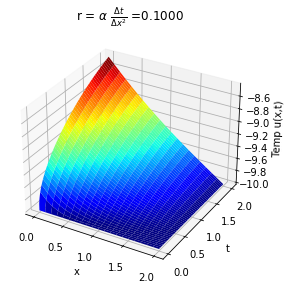

In [4]:
explicitFD(L, J, Tf, M, α)

### 2. $u_{t} = u_{xx}$

Boundary Conditions

$u(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=sin14 \pi x$

In [5]:
def explicitFD(L, J, Tf, M, α):
    '''
    Function explicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(ρ*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q/A = -1*k, (k = 1 assumed), temp at x=L, held at -10
    - initial condition - all nodes start at -10 deg
    - Explicit finite difference algorithm used - see Tveito, Winther, Chp 4.1 - 4.3
    - user should ensure r = α*Tf*J/(M*L) is less than 0.5 for numerical stability
    - r value printed in plot title
    Returns:
    Matplotlib plot object - plot of temperature array
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
        
    #Apply initial condition
    u[0,:] = [np.sin(np.pi*14*dx*i) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=l
    #u[:,0] = 0. #all rows, first column
    #u[:,-1] = 0. #all rows, last column

    #Recursion formula - Python for loop
    for m in range(0,M):
        u[m+1,1:J] = [r*u[m,j-1]+(1-2*r)*u[m,j]+r*u[m,j+1] for j in range(1,J)]# Python list comprehension across the row
        
    
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    dfplot.plot_surface(xv, tv, u, cmap='jet')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [6]:
#%precision 4
#%matplotlib ipympl
import matplotlib.pyplot as plt

# Solution code
# to get the Greek letter, type \alpha, then hit Tab
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 400 #slices along the x direction
dx = L/J
Tf = 0.003 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2



#For numerical stability r <= 0.5 - See Tveito, Winther, Chp 4.3

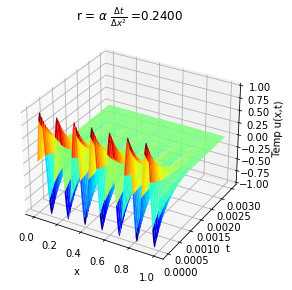

In [7]:
explicitFD(L, J, Tf, M, α)

### 3. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=x^{3}$

In [8]:
def explicitFD(L, J, Tf, M, α):
    '''
    Function explicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(ρ*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q/A = -1*k, (k = 1 assumed), temp at x=L, held at -10
    - initial condition - all nodes start at -10 deg
    - Explicit finite difference algorithm used - see Tveito, Winther, Chp 4.1 - 4.3
    - user should ensure r = α*Tf*J/(M*L) is less than 0.5 for numerical stability
    - r value printed in plot title
    Returns:
    Matplotlib plot object - plot of temperature array
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
        
    #Apply initial condition
    u[0,:] = [((dx*i)**3) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=l
    #u[:,0] = 0. #all rows, first column
    #u[:,-1] = 0. #all rows, last column

    #Recursion formula - Python for loop
    for m in range(0,M):
        u[m+1,1:J] = [r*u[m,j-1]+(1-2*r)*u[m,j]+r*u[m,j+1] for j in range(1,J)]# Python list comprehension across the row
        
    
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    dfplot.plot_surface(xv, tv, u, cmap='jet')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [9]:
#%precision 4
#%matplotlib ipympl
import matplotlib.pyplot as plt

# Solution code
# to get the Greek letter, type \alpha, then hit Tab
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 20 #slices along the x direction
dx = L/J
Tf = .2 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2


#For numerical stability r <= 0.5 - See Tveito, Winther, Chp 4.3

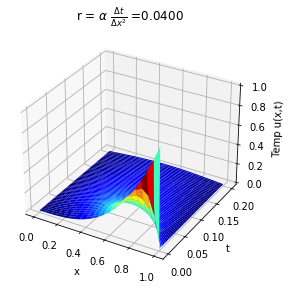

In [10]:
explicitFD(L, J, Tf, M, α)

## Implicit Examples

### 1. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=-1$

$u(2,t)=-10$

Initial Conditions

$u(x,0)=-10$

In [11]:
def implicitFD(L, J, Tf, M, α):
    '''
    Function implicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(rho*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q = -1*k, (k = 1 assumed)
    - fixed temp at x=L of -10 deg
    - initial condition - all nodes start at -10 deg
    - Implicit finite difference algorithm used - see Tveito, Winther, Chp 4.4 - 4.5
    - r = α*Tf*J**2/(M*L) - for implicit algorithm unconditionally stable
    - r value printed in plot title for comparison with explicit output
    Returns:
    Matplotlib plot object - 3d surface of u(x,t) solution
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import scipy.sparse as spsp
    import scipy.sparse.linalg as spsplin
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = -10. #row 0, all columns
    
    #Apply B.C. at x=L
    u[:,-1] = -10. #last column, all rows
    
    #Set up matrix [I + rA] - Scipy Sparse matrices
    Adiag = (1.+2.*r)*np.ones(J)
    Asubs = -r*np.ones(J)
    Asuper = -r*np.ones(J)
    I_rA = spsp.spdiags([Asubs, Adiag, Asuper], [-1, 0, 1], J, J)
    I_rA = spsp.csr_matrix(I_rA)
    
    #adjust matrix for x=0 BC
    I_rA[0,0] = 1.
    I_rA[0,1] = -1.
    
    #adjust RHS for x=L BC
    b = np.zeros(J)
    b[J-1] = r*(-10)
    for m in range(0,M):
        c = u[m,:J] + b
        c[0] = dx # x=0 RHS
        u[m+1,:J] = spsplin.spsolve(I_rA, c)
        
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    
    dfplot.plot_surface(xv, tv, u, cmap='winter')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [13]:
#%precision 4
#%matplotlib ipympl
# Solution code
α = 1.
#Discretization parameters
L = 2. # length of thermal path in x direction
J = 40 #slices along the x direction
dx = L/J
Tf = 2. #time of simulation
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2
r

0.4000

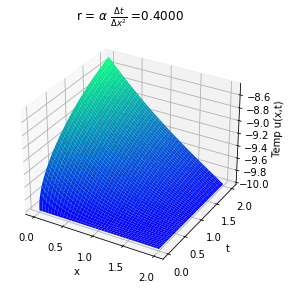

In [14]:
implicitFD(L, J, Tf, M, α)

### 2. $u_{t} = u_{xx}$

Boundary Conditions

$u(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=sin14 \pi x$

In [15]:
def implicitFD(L, J, Tf, M, α):
    '''
    Function implicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(rho*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q = -1*k, (k = 1 assumed)
    - fixed temp at x=L of -10 deg
    - initial condition - all nodes start at -10 deg
    - Implicit finite difference algorithm used - see Tveito, Winther, Chp 4.4 - 4.5
    - r = α*Tf*J**2/(M*L) - for implicit algorithm unconditionally stable
    - r value printed in plot title for comparison with explicit output
    Returns:
    Matplotlib plot object - 3d surface of u(x,t) solution
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import scipy.sparse as spsp
    import scipy.sparse.linalg as spsplin
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = [np.sin(np.pi*14*dx*i) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=L
    #u[:,-1] = 0. #last column, all rows
    #u[:,0] = 0 #first column, all rows
    
    #Set up matrix [I + rA] - Scipy Sparse matrices
    Adiag = (1.+2.*r)*np.ones(J)
    Asubs = -r*np.ones(J)
    Asuper = -r*np.ones(J)
    I_rA = spsp.spdiags([Asubs, Adiag, Asuper], [-1, 0, 1], J, J)
    I_rA = spsp.csr_matrix(I_rA)
    
    #adjust matrix for x=0 BC
    #I_rA[0,0] = 1.
    #I_rA[0,1] = -1.
    
    #adjust RHS for x=L BC
    #b = np.zeros(J)
    #b[J-1] = r*(-10)
    for m in range(0,M):
        c = u[m,:J]
        #c[0] = dx # x=0 RHS
        u[m+1,:J] = spsplin.spsolve(I_rA, c)
        
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    
    dfplot.plot_surface(xv, tv, u, cmap='winter')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [16]:
#%precision 4
#%matplotlib ipympl

# Solution code
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 400 #slices along the x direction
dx = L/J
Tf = 0.0025 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2


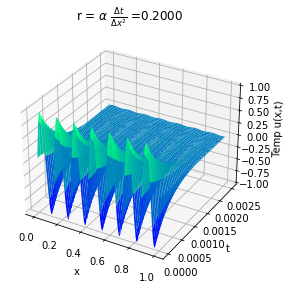

In [17]:
implicitFD(L, J, Tf, M, α)

### 3. $u_{t} = u_{xx}$

Boundary Conditions

$u_{x}(0,t)=0$

$u(1,t)=0$

Initial Conditions

$u(x,0)=x^{3}$

In [18]:
def implicitFD(L, J, Tf, M, α):
    '''
    Function implicitEx(L, J, Tf, M, α)
    Inputs:
    L - length of x domain
    J - number of x slices (J+1 calculation points or nodes)
    Tf - final solution time
    M - number of time slices
    α - thermal diffusivity of domain (k/(rho*c))
    Notes - B.C.'s:
    - heat flux at x=0 of Q = -1*k, (k = 1 assumed)
    - fixed temp at x=L of -10 deg
    - initial condition - all nodes start at -10 deg
    - Implicit finite difference algorithm used - see Tveito, Winther, Chp 4.4 - 4.5
    - r = α*Tf*J**2/(M*L) - for implicit algorithm unconditionally stable
    - r value printed in plot title for comparison with explicit output
    Returns:
    Matplotlib plot object - 3d surface of u(x,t) solution
    H. Chesser - October 2016
    '''
    #imports
    import numpy as np
    import scipy.sparse as spsp
    import scipy.sparse.linalg as spsplin
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Calculate mesh parameter
    dx = L/J
    dt = Tf/M
    r = α*dt/dx**2
    
    #Initialize solution array
    u = np.zeros((M+1,J+1)) #time = row index , x = column index
    
    #Apply initial condition
    u[0,:] = [((dx*i)**3) for i in range (J+1)] #row 0, all columns
    
    #Apply B.C. at x=L
    #u[:,-1] = 0. #last column, all rows
    #u[:,0] = 0 #first column, all rows
    
    #Set up matrix [I + rA] - Scipy Sparse matrices
    Adiag = (1.+2.*r)*np.ones(J)
    Asubs = -r*np.ones(J)
    Asuper = -r*np.ones(J)
    I_rA = spsp.spdiags([Asubs, Adiag, Asuper], [-1, 0, 1], J, J)
    I_rA = spsp.csr_matrix(I_rA)
    
    #adjust matrix for x=0 BC
    #I_rA[0,0] = 1.
    #I_rA[0,1] = -1.
    
    #adjust RHS for x=L BC
    #b = np.zeros(J)
    #b[J-1] = r*(-10)
    for m in range(0,M):
        c = u[m,:J]
        #c[0] = dx # x=0 RHS
        u[m+1,:J] = spsplin.spsolve(I_rA, c)
        
    #Make a surface plot of the result
    dfplot = plt.figure(figsize=(9,4.5))
    dfplot = plt.subplot(projection='3d')
    
    x = np.linspace(0., L, J+1)
    t = np.linspace(0., Tf, M+1)
    xv, tv = np.meshgrid(x, t)
    
    dfplot.plot_surface(xv, tv, u, cmap='winter')
    dfplot.set_xlabel('x')
    dfplot.set_ylabel('t')
    dfplot.set_zlabel(' Temp u(x,t)')
    dfplot.set_title("r = $\\alpha$ $\\frac{\Delta t}{\Delta x^2}$ ="+"{:.4f}".format(r))
    plt.show()

In [19]:
#%precision 4
#%matplotlib ipympl

# Solution code
α = 1.

#Discretization parameters
L = 1. # length of thermal path in x direction
J = 20 #slices along the x direction
dx = L/J
Tf = .2 #end time of simulation (start time is 0)
M = 2000 #time slices
dt = Tf/M
r = α*dt/dx**2

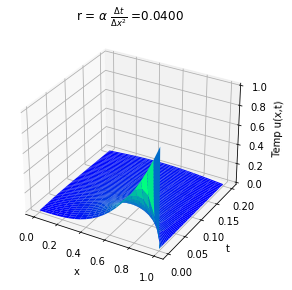

In [20]:
implicitFD(L, J, Tf, M, α)

PCB Example

A CubeSat PCB has an 8 layer design. The layers can be grouped as follows:

$6$ signal layers with (20 percent copper coverage)

$2$ power/ground layers (80 percent copper coverage)

remaining thickness FR4 glass epoxy

All copper layers are 1 oz Copper thickness

What is the effective thermal conductivity of this board?
For copper k = 390 W/mk , for fr-4 k = 0.23

In [22]:
k_Cu = 390 #W/mK thermal conductivity
k_FR4 = 0.23 #W/mK thermal conmductivity
t_sig = 0.035 #mm thickness of 10z copper
t_pow = t_sig
f_sig = 0.2 #coverage factor for sig layers
f_pow = 0.8 #coverage factor for pow layers
t = 1.58663 #mm total thickness of pcb

k_sig = k_Cu *f_sig*t_sig #equivalent total conductivity sig layer
print('conductivity of sig layer: ',k_sig) 

k_pow = k_Cu*f_pow*t_pow #equivalent total conductivity pow layer
print('conductivity of pow layer: ',k_pow)

k_FR4 = k_FR4*(t-6*t_sig-2*t_pow) #equivalent total conductivity fr-4 layer
print('conductivity of fr4 layer: ', k_FR4)

k_eff = (6*k_sig+2*k_pow+k_FR4)/t
k_eff, 'W/m-K'

conductivity of sig layer:  2.7300000000000004
conductivity of pow layer:  10.920000000000002
conductivity of fr4 layer:  0.3005249


(24.2782, 'W/m-K')

### 1. $u_{xx} = -f(x)$

Boundary Conditions

$u(0)=0$

$u(1)=0$

for 0<x<0.4: 
$f(x)=0$

for 0.4<x<0.6:
$f(x)=1$

for 0.6<x<1:
$f(x)=1$


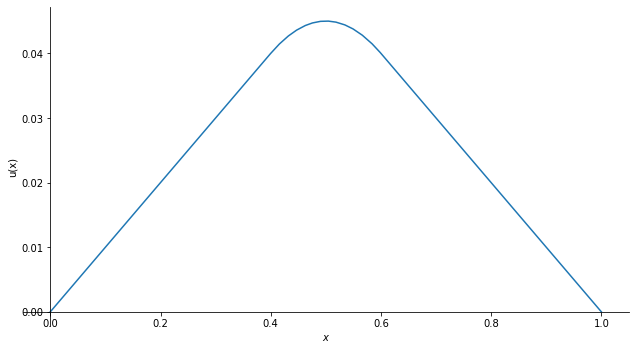

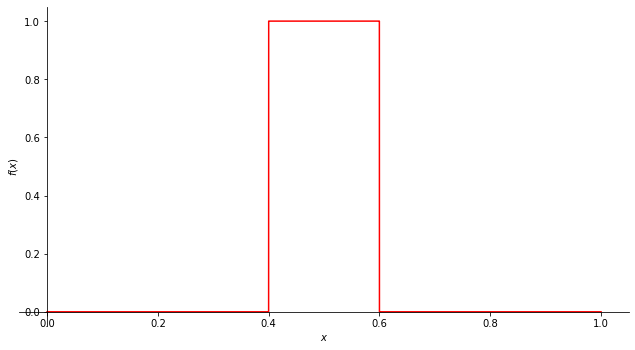

In [4]:
import sympy.plotting as symplt
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
plt.rcParams['figure.figsize'] = 9,5
x = sym.Symbol('x', real=True, positive=True)
ux = sym.Piecewise((0.1*x, x<0.4), (0.1*x-0.5*(x-0.4)**2, sym.And(x>=0.4,x<0.6)),(0.1-0.1*x, True))
fx = sym.Piecewise((0, x<0.4), (1, sym.And(x>=0.4,x<0.6)),(0, True)) 
symplt.plot(ux, (x, 0., 1.), ylabel='u(x)') 
symplt.plot(fx, (x, 0., 1.), line_color='red')

# <u>Radiation</u>
### Stefan-Boltzmann Law : 
## <center>$e(t) = \sigma T^{4}$</center>
### Planck's Law
## <center>$e_{\lambda}(\lambda , T) = \frac{2\pi hc^{2}}{\lambda^{5}}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$</center>
### <b>Important WaveBands:</b>
#### Solar - 0.2 - 2 $\mu m$ - 300K -"absorptance","short waveband"
#### Thermal - 5 - 35 $\mu m$ - 300K (room temp.) emissions - "emissivity", "Long waveband"
# Real Surfaces - Terminology
<ul>
    <li>Emission and absorption happens at the surface, so for the most part radiation properties of materials are determined by the surface finish (not generally a material property)</li>
    <li>Specular - mirror surface - angle of incidence = angle of reflection</li>
    <li>Specular - mirror surface - angle of incidence = angle of reflection</li>
    <li>Blackbody - emits energy according to the Stefan-Boltzmann Law - actual surfaces emit a fraction of this $\epsilon$</li>
</ul>

## <center>$e(t) = \epsilon \sigma T^{4}$</center>
<ul>
    <li>Opaque transmission - allows electromagnet waves to pass through (or not)</li>
    <li>Absoprtivity, reflection</li>
</ul>

## <center>$ \alpha + \rho + \tau = 1 $</center>
<ul>
    <li>For opaque surfaces</li>
</ul>

## <center>$ \alpha + \rho = 1 $</center>
# Emissivity, Absorptivity Surface Properties
<ul>
    <li>The ratio of $\frac{\alpha}{\epsilon}$ has a great effect on temp</li>
    <li>High $\frac{\alpha}{\epsilon}$ - "hot" surface</li>
    <li>Low $\frac{\alpha}{\epsilon}$ - "cold" surface</li>
</ul>

In [14]:
# Surface properties - from table in the question
#Rhodium plate
#Note to use Greek letters, type \alpha, then hit Tab
α_rh_s = 0.35
ϵ_rh_ir = 0.06
#Black Paint
α_b_s = 0.95
ϵ_b_ir = 0.95
#Conductive Paint
α_c_s = 0.3
ϵ_c_ir = 0.3
#5 mil AgFEP second surface mirror
α_ss_s = 0.09
ϵ_ss_IR = 0.75

In [10]:
#Q_in = Q_out - steady solution
# Assume the cylinder and end cap at one temperature
import numpy as np
import scipy.constants as const
degC = "\u00b0C"
# constants
σ = const.sigma #W/m**2/K**4 (5.67e-8)
S = 1366 #W/m**2 - mean solar flux
#Areas
Ap_cyl = 0.1*0.2 #m**2 - projected area of cylinder
A_cyl = np.pi*0.1*0.2 #m**2 - total surface area of cylinder
A_cap = np.pi/4*0.1**2 #m**2 - end cap area
#Rhodium plated cylinder and on end cap
Q_in_rh = α_rh_s * S * Ap_cyl
RIF_out_rh = ϵ_rh_ir * σ * A_cyl + ϵ_rh_ir * σ * A_cap
T_rh = np.sqrt(np.sqrt(Q_in_rh / RIF_out_rh)) - 273.15
print("T_rh = %.2f%s" % (T_rh, degC))

T_rh = 173.39°C


In [11]:
#Now use black paint on the end cap, Rhodium plate on the cylinder
RIF_out_rhb = ϵ_rh_ir * σ * A_cyl
+ ϵ_b_ir * σ * A_cap
# Note same Q_in as for the Rhodium case
T_rhb = np.sqrt(np.sqrt(Q_in_rh / RIF_out_rhb)) - 273.15
print("T_rhb = %.2f%s" % (T_rhb, degC))

T_rhb = 186.74°C


In [12]:
#Now use conductive paint on the cylinder, black paint on the end cap
Q_in_c = α_c_s * S * Ap_cyl
RIF_out_cb = ϵ_c_ir * σ * A_cyl
+ ϵ_b_ir * σ * A_cap
T_cb = np.sqrt(np.sqrt(Q_in_c / RIF_out_cb)) - 273.15
print("T_cb = %.2f%s" % (T_cb, degC))

T_cb = 22.77°C


In [13]:
#Now use 5mil AgFEP on the cylinder, black paint on end cap
Q_in_ss = α_ss_s * S * Ap_cyl
RIF_out_ss = ϵ_ss_IR * σ * A_cyl
+ ϵ_b_ir * σ * A_cap
T_ss = np.sqrt(np.sqrt(Q_in_ss / RIF_out_ss)) - 273.15
print("T_ss = %.2f%s" % (T_ss, degC))

T_ss = -98.98°C


## ViewFactor

In [5]:
#Check
H=(600+6378)/6378
F_1e=H**-2
qe = 0.8*236.4*F_1e
F_1e, qe

(0.84, 158.00)

In [10]:
import numpy as np
F_1e_side = 1/np.pi*(np.arctan(1/np.sqrt(H**2-1))-np.sqrt(H**2-1)/H**2)
qe_side = 0.8*236.4*F_1e_side
#Check
F_1e_side, qe_side

(0.25, 47.09)

## On-Orbit Thermal Load
### 9. 3 types of Environmental Fluxes to consider for Spacecraft heating

1.  Direct Solar

    $\Large{q_{Sun} = \frac{Q_{Sun}}{A} = S F_{i-S} = S \cos{\theta}}$
   
   $\Large{q_{Sun}^a = \alpha q_{Sun}}$

    - where $\theta$ is the angle between the surface normal (flat surface) and the sun vector and $\alpha$ is the solar absorptivity of the surface in question. For a curved surface we use the projected area. $F_{i-S}$, $\alpha$ are the solar viewfactor and solar absorptivity of the surface in question.
    
2. Albedo

    $\Large{q_{Alb} = a S F_{i-lP} = S aF(altitude, \phi)} $
    
    $\Large{q_{Alb}^a = \alpha q_{Alb}}$

    - where $a$ is the planet albedo factor (0.35 typical for Earth), $F$ is an "albedo visibility factor", $\phi$ is the solar zenith angle - angle between Sun-Planet vector and Planet-Spacecraft vector - see below. $F_{i-lP}$, $\alpha$ are the planet viewfactor (illuminated portion) and solar absorptivity of the surface in question.

3. Earth IR

    $\Large{q_E = E F_{i-P} = \sigma T_P^4 F_{i-P}}$
    
    $\Large{q_E^a = \epsilon q_E}$

    - where $E$ is the Earth IR flux (236.4 $W/m^2$), $T_P$ is the corresponding planet equivalent blackbody temperature and $F_{i-P}$, $\epsilon$ are the planet viewfactor and IR emissivity of the surface in question.

In [3]:
# Parameter set-up
%precision 2
import numpy as np
#Orbit parameter (circular orbit)
h = 600 #km
β = 0 #degrees
#Surface properties
ϵ = 0.06
α = 0.35
A = 1.
# Planet characteristics
Re = 6378 #km
μ = 398600.5 #km^3/s^2
eclipse_s = float(np.degrees(np.pi/2 + np.arccos(Re/(Re+h))))
eclipse_e = float(np.degrees(3*np.pi/2 - np.arccos(Re/(Re+h))))
eclipse_s, eclipse_e

(113.93, 246.07)

In [4]:
#Thermal environment parameters
S = 1366 #W/m^2 - Average value
a = 0.35 # Average value from Fortescue, et al
E = 236.4 #W/m^2
def viewfactors(h):
    import numpy as np
    Re = 6378. #km
    H = (h+Re)/Re
    F_12_nadir = H**-2
    F_12_side = 1/np.pi*(np.arctan(1/np.sqrt(H**2-1))-np.sqrt(H**2-1)/H**2)
    msg = 'F_12_nadir = {0:.4f}, F_12_side = {1:.4f}'.format(F_12_nadir, F_12_side)
    return msg, F_12_nadir, F_12_side
msg, VFn, VFs = viewfactors(h)
print(msg)

F_12_nadir = 0.8354, F_12_side = 0.2490


In [25]:
#θ array (type '\theta' and then press tab)
#Add points just before and just after eclipse start and stop
#Gives sharp eclipse entry/exit points
θ = np.sort(np.append(np.linspace(0, 360, 25), [eclipse_s-0.1, eclipse_s+0.1, eclipse_e-0.1, eclipse_e+0.1]))
#+Z surface
#solar
PZ_s = S*α*A*np.piecewise(θ, [np.cos(np.radians(θ)) < 0, np.cos(np.radians(θ)) >= 0],[lambda θ : 0.0, lambda θ: np.cos(np.radians(θ))])
#albedo
PZ_a = np.zeros(len(θ))
#earth IR
PZ_e = np.zeros(len(θ))
#-Z surface
# solar
conds = [np.logical_or(θ >=270., θ < 90.), np.logical_and(θ >= 90, θ < eclipse_s), np.logical_and(θ >= eclipse_s, θ < eclipse_e), np.logical_and(θ >= eclipse_e, θ < 270) ]
funcs = [lambda θ: 0., lambda θ: -np.cos(np.radians(θ)), lambda θ: 0., lambda θ: -np.cos(np.radians(θ))]
MZ_s = S*α*A*np.piecewise(θ, conds, funcs)
#albedo
MZ_a = α*a*S*A*VFn*np.piecewise(θ, [np.cos(np.radians(θ)) < 0, np.cos(np.radians(θ)) >= 0], [lambda θ : 0.0, lambda θ: np.cos(np.radians(θ))])
#Earth IR
MZ_e = E*ϵ*A*VFn*np.ones(len(θ))
#+/-Y surfaces
#solar
PY_s = np.zeros(len(θ))
MY_s = np.zeros(len(θ))
#albedo
PY_a = α*a*S*A*VFs*np.piecewise(θ, [np.cos(np.radians(θ)) < 0, np.cos(np.radians(θ)) >= 0], [lambda θ : 0.0, lambda θ: np.cos(np.radians(θ))])
MY_a = PY_a
#Earth IR
PY_e = E*ϵ*A*VFs*np.ones(len(θ))
MY_e = PY_e
#+/-X
# solar
conds = [np.logical_and(θ >=0., θ < eclipse_s), np.logical_and(θ >= eclipse_s, θ < eclipse_e), np.logical_and(θ >= eclipse_e, θ <= 360.)]
PX_funcs = [lambda θ: 0., lambda θ: 0., lambda θ: -np.sin(np.radians(θ))]
MX_funcs = [lambda θ: np.sin(np.radians(θ)), lambda θ: 0., lambda θ: 0.]
PX_s = S*α*A*np.piecewise(θ, conds, PX_funcs)
MX_s = S*α*A*np.piecewise(θ, conds, MX_funcs)
#albedo
PX_a = α*a*S*A*VFs*np.piecewise(θ, [np.cos(np.radians(θ)) < 0, np.cos(np.radians(θ)) >= 0], [lambda θ : 0.0, lambda θ: np.cos(np.radians(θ))])
MX_a = PX_a
#Earth IR
PX_e = E*ϵ*A*VFs*np.ones(len(θ))
MX_e = PX_e

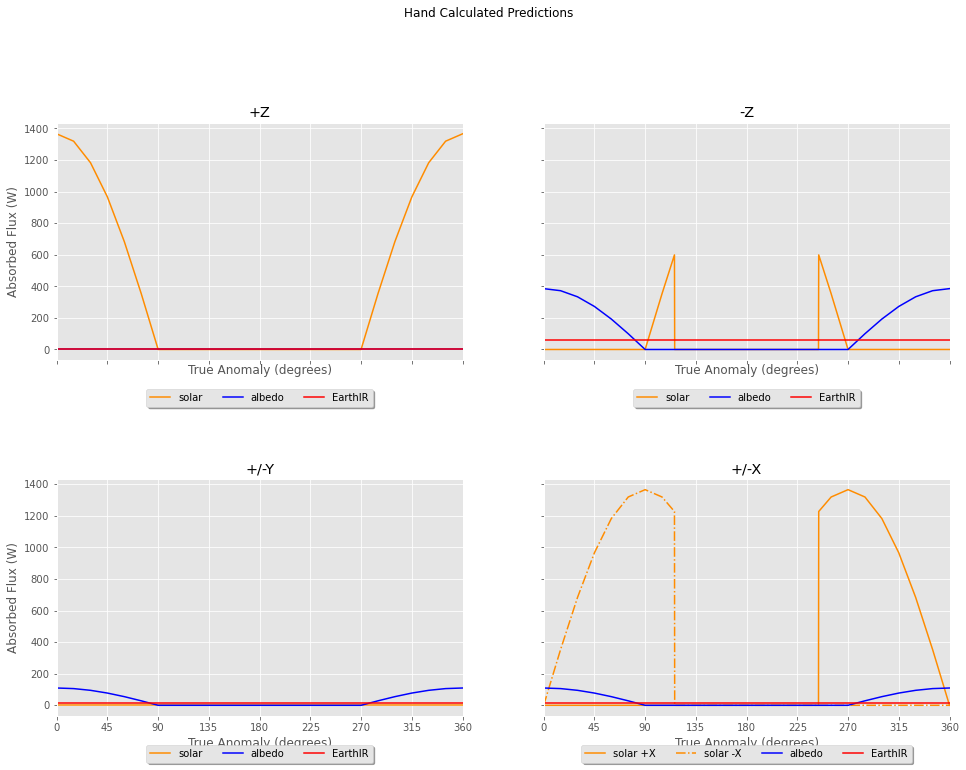

In [30]:
#matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16.0,12.0), sharey=True, sharex=True)
plt.suptitle('Hand Calculated Predictions')
ax1.plot(θ,PZ_s, label='solar', color='darkorange')
ax1.plot(θ, PZ_a, label='albedo', color='blue')
ax1.plot(θ, PZ_e, label='EarthIR', color='red')
ax1.set_title('+Z')
ax2.plot(θ,MZ_s, label='solar', color='darkorange')
ax2.plot(θ, MZ_a, label='albedo', color='blue')
ax2.plot(θ, MZ_e, label='EarthIR', color='red')
ax2.set_title('-Z')
ax3.plot(θ,PY_s, label='solar', color='darkorange')
ax3.plot(θ, PY_a, label='albedo', color='blue')
ax3.plot(θ, PY_e, label='EarthIR', color='red')
ax3.set_title('+/-Y')
ax4.plot(θ,PX_s, label='solar +X', color='darkorange')
ax4.plot(θ,MX_s, label='solar -X', color='darkorange', linestyle='-.')
ax4.plot(θ, PX_a, label='albedo', color='blue')
ax4.plot(θ, PX_e, label='EarthIR', color='red')
ax4.set_title('+/-X')
plt.setp((ax1, ax2, ax3, ax4), xticks=np.arange(0., 361., 45.))
ax1.set_ylabel('Absorbed Flux (W)')
ax3.set_ylabel('Absorbed Flux (W)')
for ax in ax1, ax2, ax3, ax4:
    ax.grid(True)
    ax.set_xlim(0., 360.)
    ax.set_xlabel('True Anomaly (degrees)')
    ax.legend()
# Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.8])
# Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
        fancybox=True, shadow=True, ncol=5)
plt.show()

# Sample Test Questions 
### <u>Heat Conduction</u>
#### Questions:
<ol>
    <li>Studying the Figure 1.1 from Lienhard, can you re-state the "First Law of Thermodynamics" as another commonly used physical principal?</li>
    <li>Can you think of an example of a system that produces mechanical work as shown in Figure 1.1a?</li>
    <li>What are the three modes of heat transfer discussed in all the readings? Provide a brief description of each.</li>
    <li>Which of these three modes would be important for spacecraft design and why?</li>
</ol>

#### Answers:
<ol>
    <li>The "First Law of Thermodynamics is basically a restatement of the conservation of energy principal - energy is neither created nor destroyed, but converted from form to form</li>
    <li>Figure 1.1a above could describe an internal combustion engine. Chemical energy from the fuel-air mixture is converted to heat (Q) when ignited. This heat raises the
temperature of the air in the engine cylinder which then results in work done on the engine's output shaft.</li>
    <li>The three modes are:<ul>
        <li>Conduction - heat is transferred through a medium (solid, liquid or gas) from areas of high temperature to low temperature.</li>
        <li> Convection - heat transfer from a solid to a fluid (liquid or gas). The fluid flows past the solid and carries away heat from its interaction with the solid (boundary layer)</li>
        <li>Radiation - heat transfer from solid, liquid or gas carried away by electromagnetic radiation produced by the agitation/oscillation of atoms/molecules near the surface of the
substance.</li>
        </ul></li>
    <li>As mentioned at the first lecture radiation and conduction are the most important transfer modes for spacecraft thermal design</li>
</ol>
<br>

### <u>Radiation</u>
#### Questions
<ol>
    <li>What is the Stefan-Boltzmann Law?</li>
    <li>What is Planck's Law? How is it related to the Stefan-Boltzmann Law?</li>
</ol>

#### Answers:
<ol>
    <li>First measured by Stefan in 1879, then explained using thermodyanmics by Boltzmann 5 years later. The Stefan-Boltzmann Law relates the thermal flux radiated away from a perfect radiator (blackbody) as electromagnetic energy to its temperature. Mathematically this is
written:</li>
<center>$e(t) = \sigma T^{4}$</center>
    <li>Planck's law provides the spectral radiance of the blackbody emission (the emission as a function wavelength or frequency)</li>
    <center>$e_{\lambda}(\lambda , T) = \frac{2\pi hc^{2}}{\lambda^{5}}\frac{1}{e^{\frac{hc}{\lambda kT}}-1}$</center>
    Integrating the above equation over all wavelengths gives the Stefan-Boltzmann equation
</ol>


### <u>Radiation Surface</u>
#### Questions
<ol>
    <li>What is the difference between the monochromatic emittance and total emittance of a surface</li>
    <li>What is Kirchoff's Law?</li>
</ol>

#### Answers:
<ol>
    <li>The monochromatic emittance of a surface refers to the emissive power of a body as a fraction of the emissive power of a black body at the same temperature, but at a
particular wavelength $\lambda$ :</li>
    
<center>$\epsilon_{\lambda} = \frac{e_{\lambda}(\lambda, T)}{e_{\lambda b}(\lambda, T)}$</center>
The total emittance on the other hand compares the total emissive power (i.e. over all wavelenghts):
<center>$\epsilon \equiv \frac{e(T)}{e_{b}(T)} = \frac{\int_{0}^{\infty} e_{\lambda}(\lambda,T)d \lambda}{\sigma T^{4}}= \frac{\int_{0}^{\infty} \epsilon_{\lambda}e_{\lambda b}(\lambda ,T)d \lambda}{\sigma T^{4}}$</center>
    <li>Kirchoff's law states that a body in thermodynamic equilibrium with its environment emits as much energy as it absorbs in each direction and at each wavelength</li>
    <center>$\epsilon_{\lambda}(T,\theta, \phi)=\alpha_{\lambda}(T,\theta,\phi)$</center>
For a diffuse, selective surface (i.e. emittance and absorptance do not depend on angles), we have:
    <center>$\epsilon_{\lambda}(T)=\alpha_{\lambda}(T)$</center>
or simply:
    <center>$\epsilon_{\lambda}=\alpha_{\lambda}$</center>
$\epsilon_{\lambda}$ and $\alpha_{\lambda}$ are called the spectral emittance and absorptance
</ol>

### <u>Viewfactors</u>
#### Questions
<ol>
    <li>For a particular body ("body 1") radiating to a set of other surfaces that form an enclosure, what is the sum of the viewfactors from body 1 to the enclosure surfaces? Why?</li>
    <li>What is viewfactor reciprocity?</li>
</ol>

#### Answers:
<ol>
    <li>Because the surfaces that body 1 sees fully enclosure it, the sum of the viewfactors from 1 to these surfaces (including itself) must sum to 1. This is because light emitted from
body 1 must strike one of the enclosure surfaces or itself. See Figure 10.7 from the text (below)</li>
    <li>Viewfactor reciprocity - when considering the net heat radiation between two surfaces '1' and '2', it turns out that:</li>
    <center>$A_{1}F_{1-2} = A_{2}F_{2-1}$</center>
</ol>

### <u>Environment Heat Loads</u>
#### Questions
<ol>
    <li>Why does the solar constant $S = 1366~W/m^2$ vary and by how much?</li>
    <li>What is the equivalent blackbody temperature of a planet? How is it calculated?</li>
</ol>

#### Answers:
<ol>
    <li>The main variation in the solar constant is due to the Earth's elliptical orbit around the sun. A second source of variation is due to the 11 year solar cycle. The flux varies from
1321.6 $W/m^2$ (aphelion) and 1412.9 $W/m^2$ (perihelion)</li>
    <li>The equivalent blackbody temperature of a planet, $T_P$ is the temperature of a blackbody necessary to balance the solar energy received.</li>
    <center>$S_p \pi R_P^2 \left( 1-a \right) = 4 \pi R_P^2 \sigma T_P^4$</center>
    where $a$, $R_P$ are the albedo coefficient and the radius of the planet and $S_p$ is the solar flux at the radius of the planet's orbit
</ol>

1. Nadir Face

    $H=\frac{h}{r}$

    $F{1 \cdot 2}=\left(\frac{1}{H}\right)^{2}$

2. Side Face

    $H=\frac{h}{r}$

    $F{1-2}=\frac{1}{\pi}\left[\tan ^{-1}\left(\frac{1}{\sqrt{H^2 -1}}\right)-\frac{\sqrt{H^{2}-1}}{H^{2}}\right]$

3. Sphere to Sphere

    $r{2}>>r{1}$

    $H=\frac{r{1}+S+r{2}}{r{2}}$

    $F{1-2}=\frac{1}{2}\left(1-\sqrt{1-\frac{1}{H^{2}}}\right)$

4. spacecraft to space environment

    $F_{1-2}= \epsilon$

- H is the altitude of the spacecraft above the surface
- h is the distance from the center of the earth to the spacecraft
- r is the radius of the earth
- $\epsilon$ is the emissivity of the spacecraft
- S is the distance between center of spheres